In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline

<AxesSubplot:>

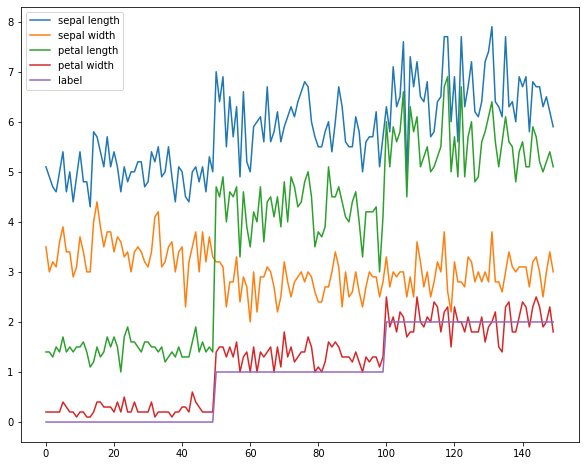

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
data['label'] = iris.target
data.plot(figsize=(10,8))

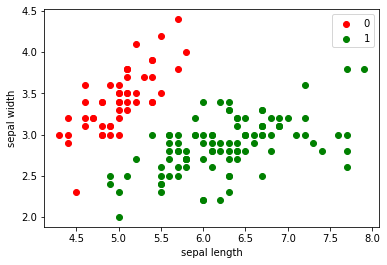

In [14]:
plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], color="r", label="0")
plt.scatter(data[50:]['sepal length'], data[50:]['sepal width'], color="g", label="1")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [17]:
origin = data[:100].sample(frac=1).reset_index(drop=True)
X = np.array(origin[['sepal length', 'sepal width']])
Y = np.array(origin['label'])
Y = [-1 if y == 0 else 1 for y in Y ]

In [66]:
class Perceptron:
    def __init__(self, eta=0.1):
        self.w = np.ones(2)
        self.b = 0.0
        self.eta = eta
    
    def sgn(self, x):
        return np.dot(self.w, x) + self.b
    
    def fit(self, x_train, y_train):
        while True:
            wrong_cnt = 0
            for x, y in list(zip(x_train, y_train)):
                if y * self.sgn(x) <= 0:
                    self.w += self.eta * y * x
                    self.b += self.eta * y
                    wrong_cnt += 1
            if wrong_cnt == 0:
                print("Perceptron Finished!")
                return
        
    def duality(self, x_train, y_train):
        a = np.zeros(len(x_train))
        Gram = np.zeros((len(x_train), len(x_train)))
        for i in range(len(x_train)):
            for j in range(len(x_train)):
                Gram[i][j] = np.dot(x_train[i], x_train[j])
        while True:
            wrong_cnt = 0
            for i in range(len(x_train)):
                sum = 0
                for j in range(len(x_train)):
                    sum += a[j] * y_train[j] * Gram[i][j]
                sum += self.b
                if y_train[i] * sum <= 0:
                    a[i] += self.eta
                    self.b += self.eta * y_train[i]
                    wrong_cnt += 1
            if wrong_cnt == 0:
                break
        self.w = np.zeros(2)
        for i in range(len(x_train)):
            self.w += a[i] * x_train[i] * y_train[i]
        print("Dual Perceptron Finished!")
        return 

In [67]:
model = Perceptron()
model.fit(X, Y)
print(model.w, model.b)

net = Perceptron()
net.duality(X, Y)
print(net.w, net.b)

Perceptron Finished!
[ 7.7  -9.39] -13.09999999999997
Dual Perceptron Finished!
[ 7.76 -9.4 ] -13.299999999999969


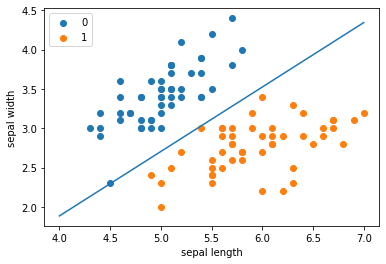

In [68]:
x_points = np.linspace(4, 7, 10) 
y_ = -(model.w[0]*x_points + model.b)/model.w[1]
x_points = np.linspace(4, 7,10) #在4到7的闭区间，划分为10个数据点
y_ = -(model.w[0]*x_points + model.b)/model.w[1] #绘plt.plot(data[:50], data[:50], 'bo', color='blue', label='0') #将前50个数据绘制成散点图
plt.plot(x_points, y_)

plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label='0')  #将数据的前50个数据绘制散点图，令其标签为0
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label='1')
plt.xlabel('sepal length') #散点图横坐标为sepal length
plt.ylabel('sepal width') #散点图纵坐标为sepal length
plt.legend()

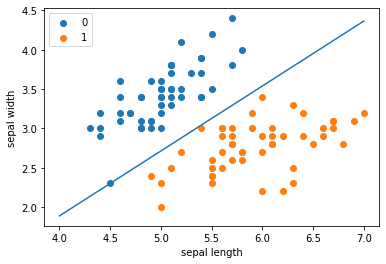

In [69]:
x_points = np.linspace(4, 7, 10) 
y_ = -(net.w[0]*x_points + net.b)/net.w[1]
x_points = np.linspace(4, 7,10) #在4到7的闭区间，划分为10个数据点
y_ = -(net.w[0]*x_points + net.b)/net.w[1] #绘plt.plot(data[:50], data[:50], 'bo', color='blue', label='0') #将前50个数据绘制成散点图
plt.plot(x_points, y_)

plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label='0')  #将数据的前50个数据绘制散点图，令其标签为0
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label='1')
plt.xlabel('sepal length') #散点图横坐标为sepal length
plt.ylabel('sepal width') #散点图纵坐标为sepal length
plt.legend()